In [1]:
import os
from pathlib import Path
import numpy as np
import rioxarray
import rasterio
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
ex_path = "/home/mila/s/sara.ebrahim-elkafrawy/scratch/patches-fr/00/00"
altitude_tif = rioxarray.open_rasterio(Path(ex_path) / "10000000_altitude.tif")
landcover_tif = rioxarray.open_rasterio(Path(ex_path) / "10000000_landcover.tif")
near_ir_jpg = Image.open(Path(ex_path) / "10000000_near_ir.jpg")


/home/mila/s/sara.ebrahim-elkafrawy/.conda/envs/gis/lib/python3.6/site-packages/rioxarray/_io.py:761: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.

/home/mila/s/sara.ebrahim-elkafrawy/.conda/envs/gis/lib/python3.6/site-packages/rioxarray/_io.py:761: NotGeoreferencedWarning:

Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.



In [19]:
rgb_jpg = Image.open(Path(ex_path) / "10000000_rgb.jpg")
# plt.imshow(rgb_jpg)

In [4]:
type(rgb_jpg)

PIL.JpegImagePlugin.JpegImageFile

In [5]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

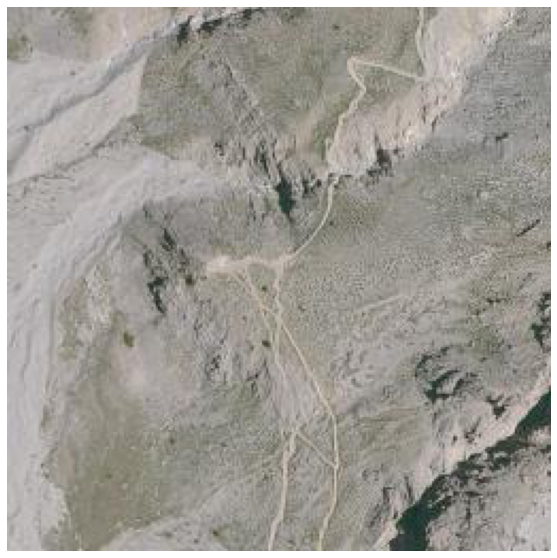

In [6]:
visualize(rgb_jpg)

In [13]:
img = np.asarray(rgb_jpg)
pil_img = Image.fromarray(img)

In [15]:
type(pil_img)

PIL.Image.Image

In [17]:
type(rgb_jpg)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
altitude_tif

<xarray.DataArray (band: 1, y: 256, x: 256)>
array([[[2221, 2221, ..., 2309, 2309],
        [2220, 2221, ..., 2308, 2309],
        ...,
        [2187, 2187, ..., 2284, 2284],
        [2187, 2187, ..., 2283, 2284]]], dtype=int16)
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
  * x            (x) float64 0.5 1.5 2.5 3.5 4.5 ... 252.5 253.5 254.5 255.5
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [5]:
print(altitude_tif.rio.crs)
print(altitude_tif.rio.nodata)
print(altitude_tif.rio.bounds())
print(altitude_tif.rio.width)
print(altitude_tif.rio.height)


None
None
(0.0, 256.0, 256.0, 0.0)
256
256


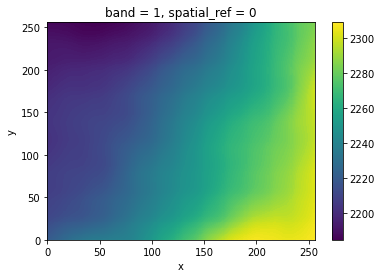

In [6]:
altitude_tif.plot()

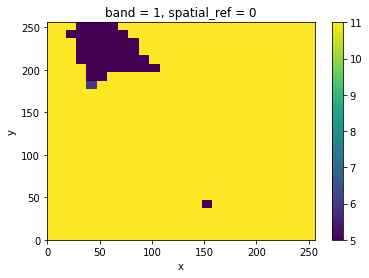

In [7]:
landcover_tif.plot()

In [16]:
landcover_tif.shape

(1, 256, 256)

# compare GeoLife dataloader and TorchGeo 

In [14]:
import tifffile
tif_img = tifffile.imread(Path(ex_path) / "10000000_altitude.tif")

In [15]:
import numpy as np

In [22]:
altitude_arr = np.expand_dims(tif_img, axis=0)

In [23]:
al = altitude_arr.astype(np.float16)

In [17]:
altitude_arr.shape

(1, 256, 256)

In [24]:
type(al[0][0][0])

numpy.float16

# try out fixed augmentations

In [10]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import PIL

In [4]:
cat_ex = "./cat.jpeg"
rgb_jpg = Image.open(Path(cat_ex))

In [5]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

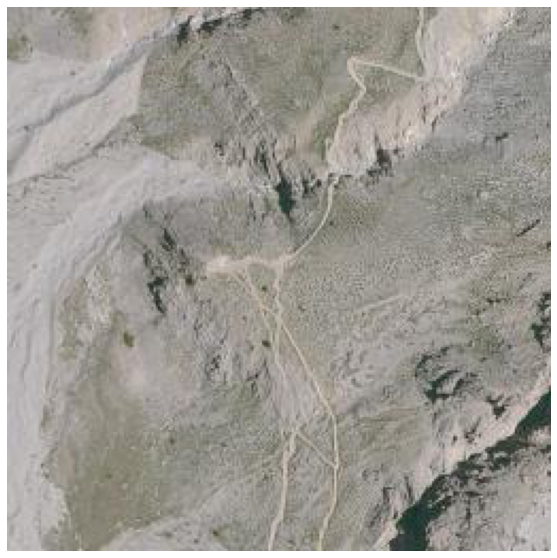

In [20]:
visualize(rgb_jpg)

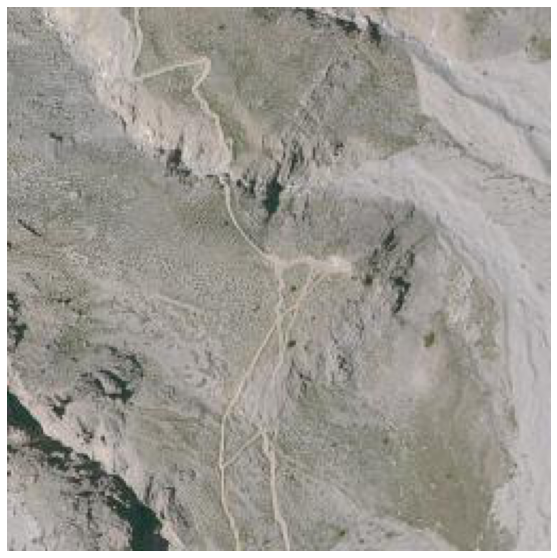

In [21]:
visualize(rgb_jpg.transpose(PIL.Image.FLIP_LEFT_RIGHT))

(256, 256)

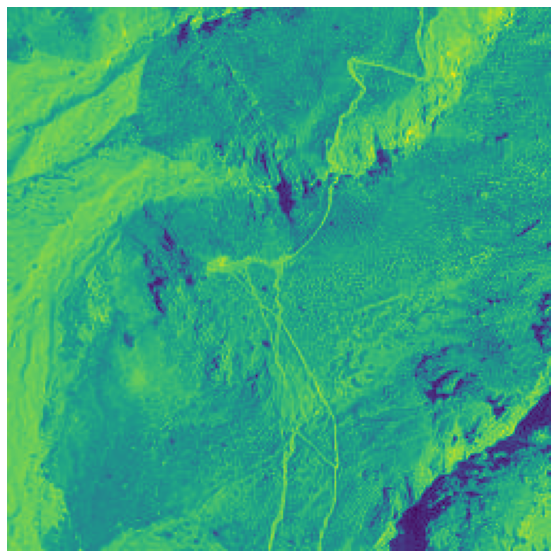

In [34]:
visualize(rgb_jpg.convert('L'))
gray_img = rgb_jpg.convert('L')
gray_img_arr = np.asarray(gray_img)
gray_img_arr.shape

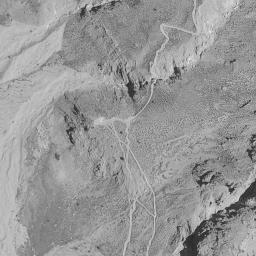

In [35]:
gray_img

In [38]:
import torchvision.transforms.functional as F
gray_img = F.rgb_to_grayscale(rgb_jpg, num_output_channels=3)
gray_img_arr = np.asarray(gray_img)
gray_img_arr.shape

(256, 256, 3)

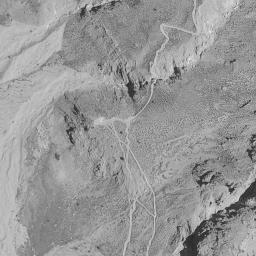

In [39]:
gray_img

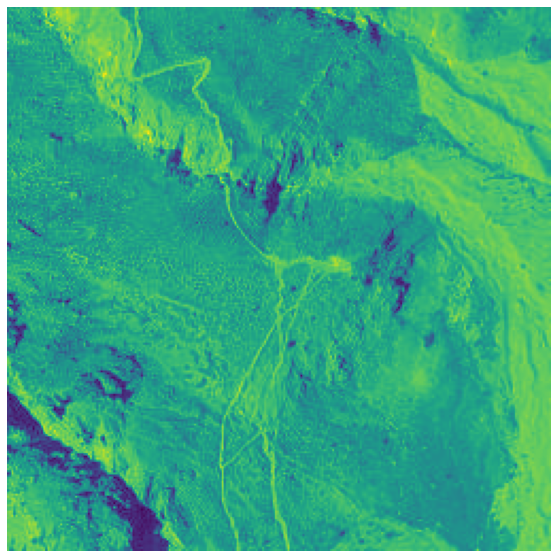

In [24]:
visualize(rgb_jpg.transpose(PIL.Image.FLIP_LEFT_RIGHT).convert('L'))